In [1]:
import cv2
import matplotlib.pyplot as plt

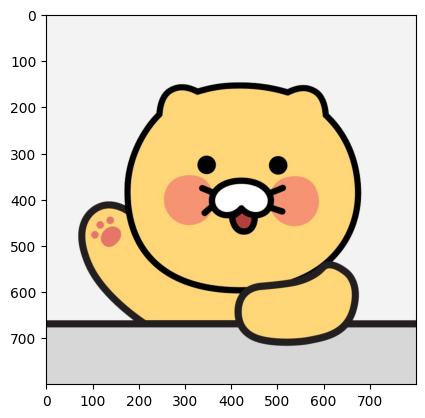

In [2]:
# cv.2.IMREAD_COLOR : 이미지를 컬러로 읽어들임
# cv2.IMREAD_GRAYSCALE : 이미지를 흑백으로 읽어들임
# cv2.IMREAD_UNCHANGED : 이미지를 알파 채널(투명도 채널)까지 포함하여 읽어들임
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
px = img_basic[500, 500]
# B, G, R 순서로 출력
px

array([120, 215, 255], dtype=uint8)

In [4]:
# G만 출력
px[1]

215

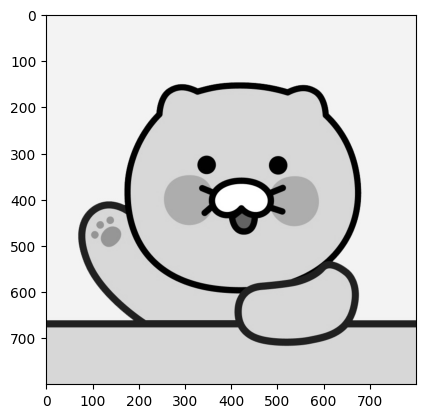

In [5]:
img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

In [6]:
print(img_basic.shape)
print(img_basic.size)

(800, 800)
640000


In [7]:
px = img_basic[550, 400]
px

216

--- 0.0029897689819335938 seconds ---
--- 0.0 seconds ---


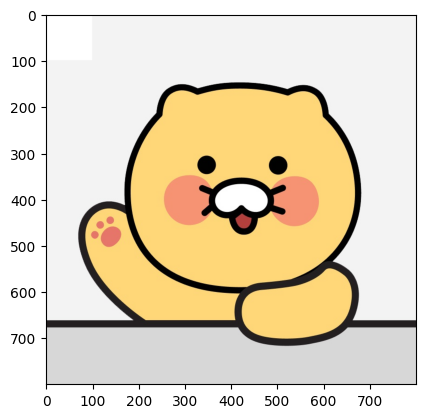

In [8]:
import time

img_basic = cv2.imread('../assets/cs.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        img_basic[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
img_basic[0:100, 0:100] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

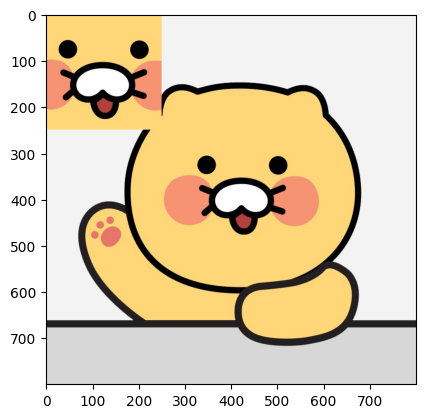

In [9]:
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_UNCHANGED)

# ROI(Region of Interest, 관심 영역) 설정
# 필터링하거나 어떤 식으로든 연산을 수행하려는 영상의 부분
# [y범위, x범위]
roi = img_basic[250:500, 300:550]
img_basic[0:250, 0:250] = roi

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

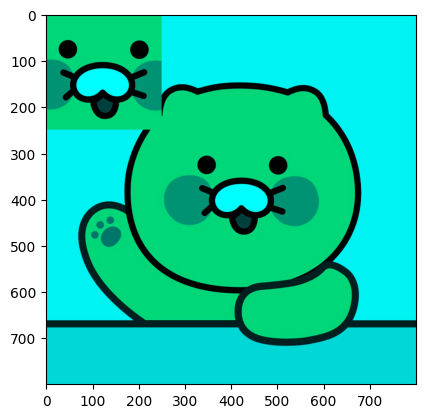

In [10]:
img_basic[:, :, 2] = 0

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
def color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

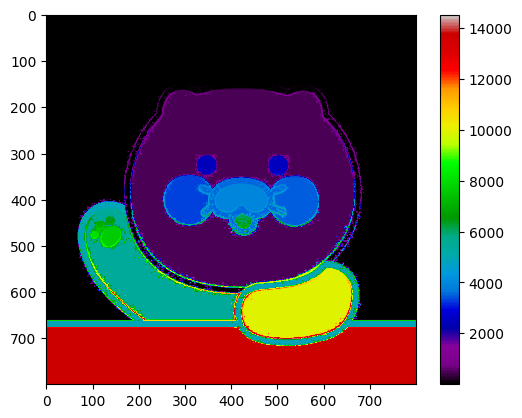

In [12]:
# DFS로 색 탐색하면서 같은 색깔끼리 묶어주기

import numpy as np
import sys

sys.setrecursionlimit(10**6)

img = cv2.imread('../assets/cs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

visited = np.zeros((img.shape[0], img.shape[1]))
group_id = 1  # 각 그룹에 고유한 ID 할당을 시작하는 값
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

def dfs(x, y, color, id, threshold=8):
    visited[x, y] = id
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if nx < 0 or nx >= img.shape[0] or ny < 0 or ny >= img.shape[1]:
            continue
        if visited[nx, ny] == 0 and color_distance(img[nx, ny], color) < threshold:
            dfs(nx, ny, color, id, threshold)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i, j] == 0:
            dfs(i, j, img[i, j], group_id)
            group_id += 1  # 새 그룹을 시작할 때마다 ID 증가

# 결과를 보여줍니다. 각각의 그룹은 고유한 숫자(그룹 ID)로 표시됩니다.
plt.imshow(visited, cmap='nipy_spectral')
plt.colorbar()  # 색상 막대를 추가하여 다양한 그룹을 시각적으로 구분할 수 있습니다.
plt.show()

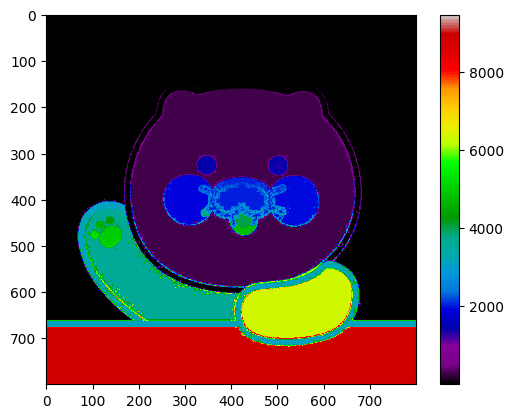

In [13]:
# DFS로 색 탐색하면서 같은 색깔끼리 묶어주기

import numpy as np
import sys

sys.setrecursionlimit(10**6)

img = cv2.imread('../assets/cs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

visited = np.zeros((img.shape[0], img.shape[1]))
group_id = 1  # 각 그룹에 고유한 ID 할당을 시작하는 값
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

def dfs(x, y, color, id, threshold=12):
    visited[x, y] = id
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if nx < 0 or nx >= img.shape[0] or ny < 0 or ny >= img.shape[1]:
            continue
        if visited[nx, ny] == 0 and color_distance(img[nx, ny], color) < threshold:
            dfs(nx, ny, color, id, threshold)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i, j] == 0:
            dfs(i, j, img[i, j], group_id)
            group_id += 1  # 새 그룹을 시작할 때마다 ID 증가

# 결과를 보여줍니다. 각각의 그룹은 고유한 숫자(그룹 ID)로 표시됩니다.
plt.imshow(visited, cmap='nipy_spectral')
plt.colorbar()  # 색상 막대를 추가하여 다양한 그룹을 시각적으로 구분할 수 있습니다.
plt.show()

In [14]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import sys
# 
# # 재귀 한도 설정
# sys.setrecursionlimit(10**6)
# 
# # 이미지 로드 및 RGB로 변환
# img = cv2.imread('../assets/cs.jpg')  # 이미지 경로를 수정해야 합니다.
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 
# # 방문 여부와 그룹 ID를 저장할 배열 초기화
# visited = np.zeros((img.shape[0], img.shape[1]))
# group_id = 1  # 시작 그룹 ID
# 
# # 이동 방향 (상하좌우)
# dx = [1, -1, 0, 0]
# dy = [0, 0, 1, -1]
# 
# # 색상 거리 계산 함수
# def color_distance(color1, color2):
#     return np.sqrt(np.sum((color1 - color2) ** 2))
# 
# # 적응형 임계값을 위한 함수 (예제로 간단히 구현됨)
# def adaptive_threshold(x, y, img):
#     # 주변 픽셀의 색상을 기반으로 적응형 임계값 계산
#     # 여기서는 전체 이미지의 색상 변화를 기준으로 한 고정값 사용
#     # 실제 구현에서는 x, y 주변의 로컬 영역을 분석하여 임계값을 동적으로 조정할 수 있습니다.
#     std_dev = np.std(img)
#     return max(5, min(10, std_dev))  # 예제 임계값 범위: 5 ~ 10
# 
# # DFS 함수
# def dfs(x, y, color, id):
#     global img, visited, dx, dy
#     threshold = adaptive_threshold(x, y, img)
#     visited[x, y] = id
#     for i in range(4):
#         nx = x + dx[i]
#         ny = y + dy[i]
#         if nx < 0 or nx >= img.shape[0] or ny < 0 or ny >= img.shape[1]:
#             continue
#         if visited[nx, ny] == 0 and color_distance(img[nx, ny], color) < threshold:
#             dfs(nx, ny, img[nx, ny], id)
# 
# # 이미지 전체를 순회하며 DFS 실행
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if visited[i, j] == 0:
#             dfs(i, j, img[i, j], group_id)
#             group_id += 1  # 새 그룹 ID 할당
# 
# # 결과 시각화
# plt.imshow(visited, cmap='nipy_spectral')
# plt.colorbar()  # 색상 막대로 그룹 구분
# plt.show()


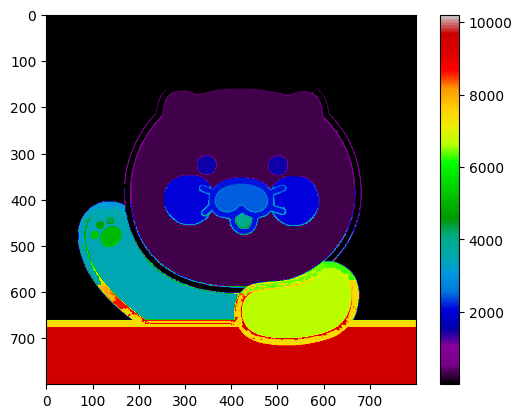

In [16]:
import cv2
import numpy as np
from skimage import color
from skimage.color import deltaE_ciede2000
import matplotlib.pyplot as plt
import sys

# 재귀 한도 설정
sys.setrecursionlimit(10**6)

# 이미지 로드 및 BGR에서 RGB로 변환
img = cv2.imread('../assets/cs.jpg')  # 이미지 경로 수정 필요
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB 이미지를 Lab 색상 공간으로 변환
img_lab = color.rgb2lab(img_rgb)

# 방문 여부와 그룹 ID를 저장할 배열 초기화
visited = np.zeros((img.shape[0], img.shape[1]))
group_id = 1  # 시작 그룹 ID

# 이동 방향 (상하좌우)
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

# CIEDE2000을 사용한 색상 유사도 판단 함수
def is_similar_color(lab1, lab2, threshold=2.3):
    # CIEDE2000 색상 차이 계산
    delta_e = deltaE_ciede2000(lab1, lab2)
    return delta_e < threshold

# DFS 함수
def dfs(x, y, color_lab, id):
    global img_lab, visited, dx, dy
    visited[x, y] = id
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if nx < 0 or nx >= img_lab.shape[0] or ny < 0 or ny >= img_lab.shape[1]:
            continue
        if visited[nx, ny] == 0 and is_similar_color(img_lab[x, y], img_lab[nx, ny]):
            dfs(nx, ny, img_lab[nx, ny], id)

# 이미지 전체를 순회하며 DFS 실행
for i in range(img_lab.shape[0]):
    for j in range(img_lab.shape[1]):
        if visited[i, j] == 0:
            dfs(i, j, img_lab[i, j], group_id)
            group_id += 1  # 새 그룹 ID 할당

# 결과 시각화
plt.imshow(visited, cmap='nipy_spectral')
plt.colorbar()  # 색상 막대로 그룹 구분
plt.show()
